### Project Objectives

Provider Fraud is one of the biggest problems facing Medicare. According to the government, the total Medicare spending increased exponentially due to frauds in Medicare claims. Healthcare fraud is an organized crime which involves peers of providers, physicians, beneficiaries acting together to make fraud claims.

Rigorous analysis of Medicare data has yielded many physicians who indulge in fraud. They adopt ways in which an ambiguous diagnosis code is used to adopt costliest procedures and drugs. Insurance companies are the most vulnerable institutions impacted due to these bad practices. Due to this reason, insurance companies increased their insurance premiums and as result healthcare is becoming costly matter day by day.

Healthcare fraud and abuse take many forms. Some of the most common types of frauds by providers are:<br>
* Billing for services that were not provided.<br>
* Duplicate submission of a claim for the same service.<br>
* Misrepresenting the service provided.<br>
*  Charging for a more complex or expensive service than was actually provided.<br>
* Billing for a covered service when the service actually provided was not covered.

### Problem Statement

The goal of this project is to " predict the potentially fraudulent providers " based on the claims filed by them.along with this, we will also discover important variables helpful in detecting the behaviour of potentially fraud providers. further, we will study fraudulent patterns in the provider's claims to understand the future behaviour of providers.

### Introduction to the Dataset

For the purpose of this project, we are considering Inpatient claims, Outpatient claims and Beneficiary details of each provider.<br>
Lets see their details :<br>
* Inpatient Data:<br>
This data provides insights about the claims filed for those patients who are admitted in the hospitals. It also provides additional details like their admission and discharge dates and admit d diagnosis code.<br>
* Outpatient Data:<br>
This data provides details about the claims filed for those patients who visit hospitals and not admitted in it.<br>
* Beneficiary Details Data:<br>
This data contains beneficiary KYC details like health conditions,regioregion they belong to etc.

### Defintions:<br>
* DOB: Date of birth
* DOD: Date of death
* Part A coverage: Medicare Part A, often referred to as hospital insurance, primarily covers inpatient care in hospitals, skilled nursing facilities, hospice care, and some home health services.<br>
* Part B coverage: Medicare Part B is a component of Original Medicare that covers medically necessary services and preventive care, such as doctor visits, outpatient care, and certain medical supplies.<br>
* IPAnnualReimbursementAmt: This refers to the total amount reimbursed by the insurance provider for inpatient (IP) services over a year. It represents the financial compensation received for covered inpatient medical expenses.<br>
* OPAnnualReimbursementAmt: Similar to the inpatient counterpart, this term denotes the total amount reimbursed by the insurance provider for outpatient (OP) services over a year. It reflects the financial compensation for covered outpatient medical expenses.<br>
* IPAnnualDeductibleAmt: This is the total amount that an individual must pay out-of-pocket for inpatient services before the insurance coverage begins to reimburse any costs. It is a yearly threshold that must be met.<br>
* OPAnnualDeductibleAmt: This indicates the total out-of-pocket expense that an individual must cover for outpatient services before their insurance starts to pay for those costs. Like the inpatient deductible, it is calculated annually. 

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [81]:
# open datasets
test_beneficiary = pd.read_csv("data_base/Test_Beneficiarydata-1542969243754.csv")
test_inpatient = pd.read_csv("data_base/Test_Inpatientdata-1542969243754.csv")
test_outpatient = pd.read_csv("data_base/Test_Outpatientdata-1542969243754.csv")
test = pd.read_csv("data_base/Test-1542969243754.csv")
train_beneficiary = pd.read_csv("data_base/Train_Beneficiarydata-1542865627584.csv")
train_inpatient = pd.read_csv("data_base/Train_Inpatientdata-1542865627584.csv")
train_outpatient = pd.read_csv("data_base/Train_Outpatientdata-1542865627584.csv")
train = pd.read_csv("data_base/Train-1542865627584.csv")

#### Beneficiaries Data Set.

In [82]:
test_beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,...,1,2,1,2,2,2,21260,2136,120,100


In [83]:
test_beneficiary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63968 entries, 0 to 63967
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   BeneID                           63968 non-null  object
 1   DOB                              63968 non-null  object
 2   DOD                              574 non-null    object
 3   Gender                           63968 non-null  int64 
 4   Race                             63968 non-null  int64 
 5   RenalDiseaseIndicator            63968 non-null  object
 6   State                            63968 non-null  int64 
 7   County                           63968 non-null  int64 
 8   NoOfMonths_PartACov              63968 non-null  int64 
 9   NoOfMonths_PartBCov              63968 non-null  int64 
 10  ChronicCond_Alzheimer            63968 non-null  int64 
 11  ChronicCond_Heartfailure         63968 non-null  int64 
 12  ChronicCond_KidneyDisease       

In [84]:
test_beneficiary.shape

(63968, 25)

In [85]:
# checking for duplicates on beneficiaries column.
# display duplicated beneficiaries in the column.
print(f"There are {test_beneficiary['BeneID'].duplicated().sum()} duplicate beneficiaries.")

There are 0 duplicate beneficiaries.


In [86]:
# display unique number of beneficiaries.
print(f"There are {len(test_beneficiary.BeneID.unique())} unique beneficiaries.")

There are 63968 unique beneficiaries.


In [87]:
# distribution of beneficiaries by gender
gender_distribution = test_beneficiary['Gender'].value_counts()
print("Distribution of Beneficiaries by Gender:")
print(gender_distribution)

Distribution of Beneficiaries by Gender:
Gender
2    36721
1    27247
Name: count, dtype: int64


In [88]:
# calculate percentage distribution
percentage_distribution = (test_beneficiary['Gender'].value_counts(normalize=True) * 100).round(2)
print("\nPercentage Distribution:")
print(percentage_distribution)


Percentage Distribution:
Gender
2    57.41
1    42.59
Name: proportion, dtype: float64


/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_67741/1935555145.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=test_beneficiary, x='Gender',


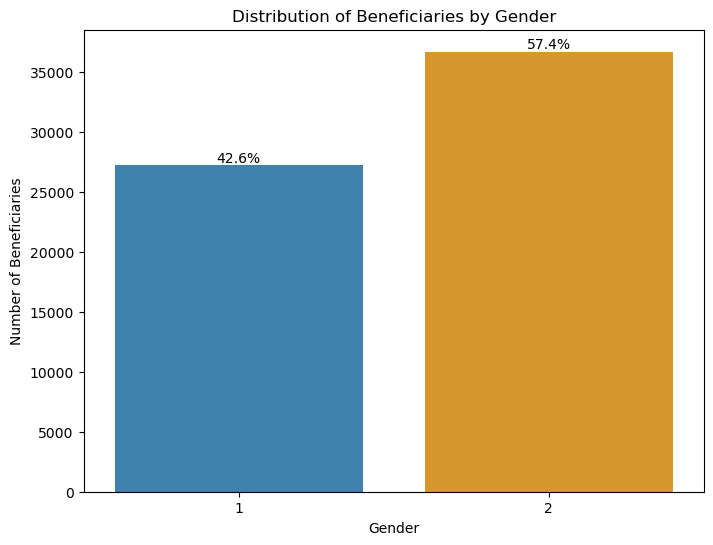

In [89]:
# create the plot
plt.figure(figsize=(8, 6))

ax = sns.countplot(data=test_beneficiary, x='Gender', 
                  palette=['#2E86C1', '#F39C12'])

# Calculate percentages
total = len(test_beneficiary)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Distribution of Beneficiaries by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Beneficiaries')
plt.show()

##### DOB column is object, we have to convert it into datetime type in order to manipulate it.

In [90]:
# Simple conversion (since it's in standard ISO format)
test_beneficiary['DOB'] = pd.to_datetime(test_beneficiary['DOB'])

# Verify the conversion
print("New data type:", test_beneficiary['DOB'].dtype)

# Display a few examples to confirm the conversion
print("\nFirst few dates after conversion:")
print(test_beneficiary['DOB'].head())

New data type: datetime64[ns]

First few dates after conversion:
0   1943-01-01
1   1940-09-01
2   1936-07-01
3   1914-03-01
4   1938-04-01
Name: DOB, dtype: datetime64[ns]


In [91]:
test_beneficiary['Year'] = test_beneficiary['DOB'].dt.year
# group by year and count the number of beneficiaries
beneficiaries_by_year = test_beneficiary.groupby('Year').size().reset_index(name='Count')
beneficiaries_by_year.head()

,Year,Count
0,1909,361
1,1910,342
2,1911,337
3,1912,352
4,1913,356


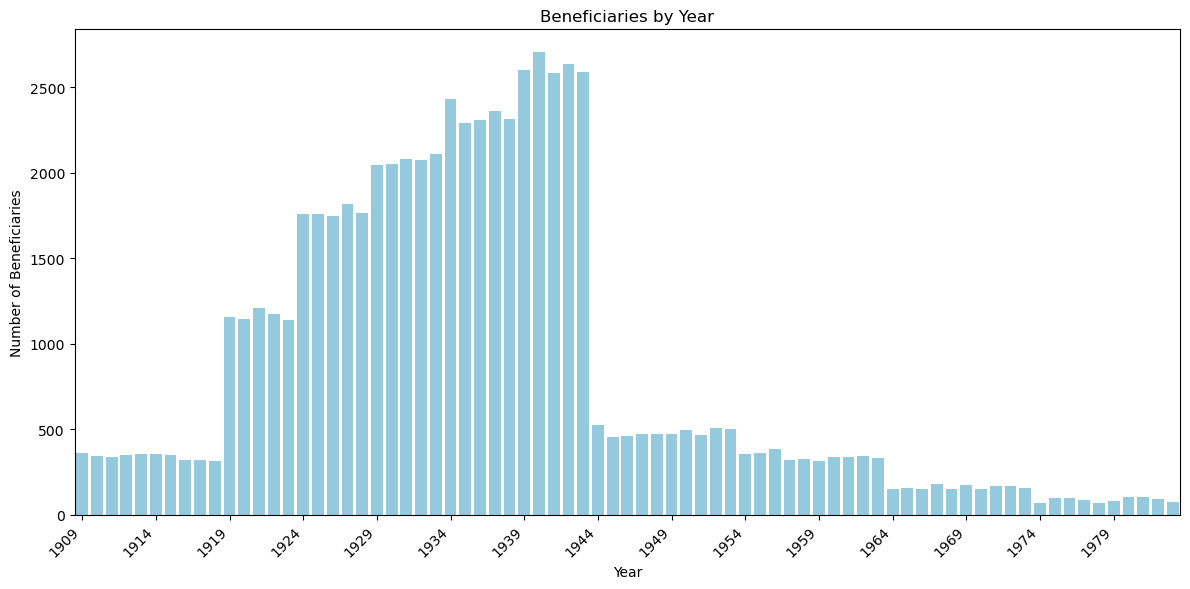

In [92]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Count', data=beneficiaries_by_year, color='skyblue')

# Adjust x-axis to show every 5th year
xticks = beneficiaries_by_year['Year'][::5]
plt.xticks(ticks=range(0, len(beneficiaries_by_year), 5), labels=xticks, rotation=45, ha='right')

plt.xlabel('Year')
plt.ylabel('Number of Beneficiaries')
plt.title('Beneficiaries by Year')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

##### Most of beneficiaries are born between 1919-1943.<br>
##### We can categorize beneficiaries by year in 6 groups:<br>
* 1. 1909-1918.<br>
* 2. 1919-1943.<br>
* 3. 1944-1953.<br>
* 4. 1954-1963.<br>
* 5. 1964-1973.<br>
* 6. 1974-1983.

/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_67741/175360841.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  beneficiaries_by_category = beneficiaries_by_year.groupby('Year_Category')['Count'].sum().reset_index()
/var/folders/qk/q0fv26q13m760q3ch0fljs240000gn/T/ipykernel_67741/175360841.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year_Category', y='Count', data=beneficiaries_by_category, palette='Blues_d')


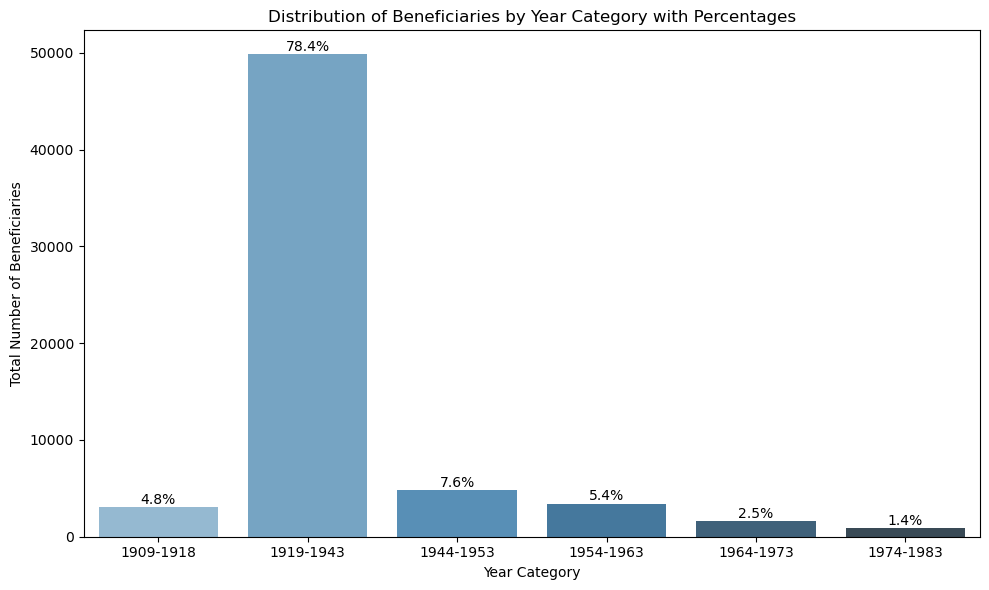

In [93]:
# Define the year categories
bins = [1909, 1918, 1943, 1953, 1963, 1973, 1983]
labels = ['1909-1918', '1919-1943', '1944-1953', '1954-1963', '1964-1973', '1974-1983']

# Create a new column 'Year_Category' that classifies each year into one of the categories
beneficiaries_by_year['Year_Category'] = pd.cut(beneficiaries_by_year['Year'], bins=bins, labels=labels, right=True)

# Group by the 'Year_Category' and sum the number of beneficiaries
beneficiaries_by_category = beneficiaries_by_year.groupby('Year_Category')['Count'].sum().reset_index()

# Calculate the total number of beneficiaries
total_beneficiaries = beneficiaries_by_category['Count'].sum()

# Calculate the percentage for each category
beneficiaries_by_category['Percentage'] = (beneficiaries_by_category['Count'] / total_beneficiaries) * 100

# Plotting the distribution by categories
plt.figure(figsize=(10, 6))
sns.barplot(x='Year_Category', y='Count', data=beneficiaries_by_category, palette='Blues_d')

# Adding percentages on top of each bar
for index, row in beneficiaries_by_category.iterrows():
    plt.text(index, row['Count'] + 50, f'{row["Percentage"]:.1f}%', ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Year Category')
plt.ylabel('Total Number of Beneficiaries')
plt.title('Distribution of Beneficiaries by Year Category with Percentages')

# Display the plot
plt.tight_layout()
plt.show()

##### Let's check the column of DOD.

In [94]:
# Simple conversion (since it's in standard ISO format)
test_beneficiary['DOD'] = pd.to_datetime(test_beneficiary['DOD'])

# Verify the conversion
print("New data type:", test_beneficiary['DOD'].dtype)

# Display a few examples to confirm the conversion
print("\nFirst few dates after conversion:")
print(test_beneficiary['DOD'].head())

New data type: datetime64[ns]

First few dates after conversion:
0          NaT
1   2009-12-01
2          NaT
3          NaT
4          NaT
Name: DOD, dtype: datetime64[ns]


In [95]:
test_beneficiary['DOD'].unique()

<DatetimeArray>
[                'NaT', '2009-12-01 00:00:00', '2009-09-01 00:00:00',
 '2009-05-01 00:00:00', '2009-08-01 00:00:00', '2009-10-01 00:00:00',
 '2009-06-01 00:00:00', '2009-07-01 00:00:00', '2009-02-01 00:00:00',
 '2009-04-01 00:00:00', '2009-11-01 00:00:00', '2009-03-01 00:00:00',
 '2009-01-01 00:00:00']
Length: 13, dtype: datetime64[ns]

##### There are only dead dates for year 2009.

##### Let's investigate the rows of patients who are dead.

In [ ]:
# Calculate the age by subtracting DOB from DOD and getting the difference in years
subset_died_patients['Age_at_death'] = (subset_died_patients['DOD'] - subset_died_patients['DOB']).dt.days / 365.25

# Round the age to the nearest integer
subset_died_patients['Age_at_death'] = subset_died_patients['Age_at_death'].round()

# Check the distribution of ages, you can use:
print(subset_died_patients['Age_at_death'].describe())


count    574.000000
mean      74.412892
std       11.110672
min       37.000000
25%       68.000000
50%       75.000000
75%       82.000000
max      100.000000
Name: Age_at_death, dtype: float64


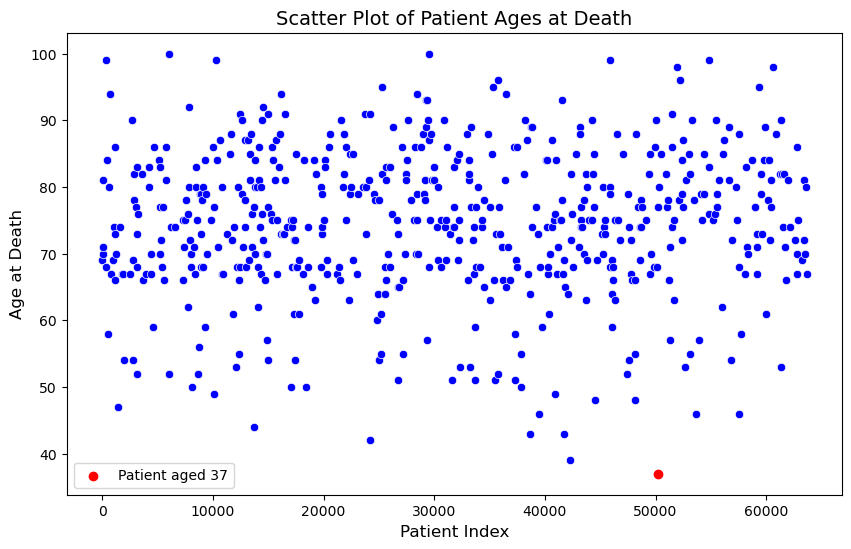

In [97]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=subset_died_patients.index, y=subset_died_patients['Age_at_death'], color='blue')

# Highlight the patient who died at the age of 37
patient_37 = subset_died_patients[subset_died_patients['Age_at_death'] == 37]
plt.scatter(patient_37.index, patient_37['Age_at_death'], color='red', label='Patient aged 37')

# Title and labels
plt.title('Scatter Plot of Patient Ages at Death', fontsize=14)
plt.xlabel('Patient Index', fontsize=12)
plt.ylabel('Age at Death', fontsize=12)

# Show the legend
plt.legend()

# Display the plot
plt.show()

##### We can conclude that the minimum age of death is not an outlier, also there is no specific pattern of ages through the patients, the ages are distributed uniformly from the minimum to the maximum.

##### Average death age is 74 years old.

In [98]:
test_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
test_inpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  9551 non-null   object 
 1   ClaimID                 9551 non-null   object 
 2   ClaimStartDt            9551 non-null   object 
 3   ClaimEndDt              9551 non-null   object 
 4   Provider                9551 non-null   object 
 5   InscClaimAmtReimbursed  9551 non-null   int64  
 6   AttendingPhysician      9520 non-null   object 
 7   OperatingPhysician      5589 non-null   object 
 8   OtherPhysician          1013 non-null   object 
 9   AdmissionDt             9551 non-null   object 
 10  ClmAdmitDiagnosisCode   9551 non-null   object 
 11  DeductibleAmtPaid       9355 non-null   float64
 12  DischargeDt             9551 non-null   object 
 13  DiagnosisGroupCode      9551 non-null   object 
 14  ClmDiagnosisCode_1      9551 non-null   

In [100]:
test_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5939
4,BENE11007,CLM521391,2009-08-12,2009-08-12,PRV56573,10,PHY417685,NaN,PHY382041,V666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [101]:
test_outpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125841 entries, 0 to 125840
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  125841 non-null  object 
 1   ClaimID                 125841 non-null  object 
 2   ClaimStartDt            125841 non-null  object 
 3   ClaimEndDt              125841 non-null  object 
 4   Provider                125841 non-null  object 
 5   InscClaimAmtReimbursed  125841 non-null  int64  
 6   AttendingPhysician      125525 non-null  object 
 7   OperatingPhysician      21604 non-null   object 
 8   OtherPhysician          47619 non-null   object 
 9   ClmDiagnosisCode_1      123263 non-null  object 
 10  ClmDiagnosisCode_2      78110 non-null   object 
 11  ClmDiagnosisCode_3      49266 non-null   object 
 12  ClmDiagnosisCode_4      30470 non-null   object 
 13  ClmDiagnosisCode_5      17966 non-null   object 
 14  ClmDiagnosisCode_6  

In [102]:
test.head()

,Provider
0,PRV51002
1,PRV51006
2,PRV51009
3,PRV51010
4,PRV51018


In [103]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Provider  1353 non-null   object
dtypes: object(1)
memory usage: 10.7+ KB


In [104]:
train_beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [105]:
train_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [106]:
train_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [107]:
train.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


#### 21. Cleaning test_inpatient dataset.

In [108]:
# Count occurrences of each unique value
provider_counts = test_inpatient['Provider'].value_counts()
print(provider_counts)


Provider
PRV53866    604
PRV52618    345
PRV51407    272
PRV53105    216
PRV56573    185
           ... 
PRV51537      1
PRV56786      1
PRV52812      1
PRV51461      1
PRV55781      1
Name: count, Length: 520, dtype: int64


In [109]:
# Count occurrences of each unique value of attending physicians.
attending_physician_counts = test_inpatient['AttendingPhysician'].value_counts()
print(attending_physician_counts)

AttendingPhysician
PHY329480    301
PHY356825    299
PHY412004    270
PHY369188    215
PHY356145    185
            ... 
PHY420458      1
PHY425548      1
PHY321166      1
PHY378553      1
PHY332594      1
Name: count, Length: 2657, dtype: int64


In [110]:
# Count occurrences of each unique value of operating physicians.
operating_physician_counts = test_inpatient['OperatingPhysician'].value_counts()
print(operating_physician_counts)

OperatingPhysician
PHY356259    170
PHY350998    170
PHY335869    139
PHY411861    135
PHY356145    112
            ... 
PHY403907      1
PHY393459      1
PHY362342      1
PHY352502      1
PHY389249      1
Name: count, Length: 1870, dtype: int64
